# Автокореляция


In [21]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels. tsa.stattools import adfuller

In [2]:
df = pd.read_csv("passengers.csv")

In [3]:
df["Month"] = pd.to_datetime(df["Month"])
df = df.set_index("Month")

In [4]:
# Функция для вычисления автокорреляции
def calculate_acf(data, max_lag):
    acf_values = []
    for lag in range(1, max_lag + 1):
        shifted_data = np.roll(data, lag)
        acf = np.corrcoef(data, shifted_data)[0, 1]
        acf_values.append(acf)
    return acf_values

# Вычисление автокорреляции для лагов от 1 до 50
max_lag = 50
passengers_acf = calculate_acf(df['#Passengers'].values, max_lag)

# Вывод результатов
for lag, acf_value in enumerate(passengers_acf, start=1):
    print(f'Lag {lag}: {acf_value}')

Lag 1: 0.935641808571359
Lag 2: 0.8546406312095957
Lag 3: 0.7723216978671419
Lag 4: 0.700697384412228
Lag 5: 0.636350854540938
Lag 6: 0.5792121389091646
Lag 7: 0.54343642454843
Lag 8: 0.5240952457831637
Lag 9: 0.526989255599165
Lag 10: 0.5493109340641208
Lag 11: 0.5824589108350411
Lag 12: 0.5899956781715073
Lag 13: 0.5306519564039025
Lag 14: 0.4562230384060133
Lag 15: 0.3842809475132775
Lag 16: 0.3207079676129536
Lag 17: 0.26096240801495346
Lag 18: 0.21296781104122667
Lag 19: 0.1849990234289292
Lag 20: 0.1712242947059914
Lag 21: 0.18157246916055442
Lag 22: 0.20121636251873032
Lag 23: 0.2368312445676621
Lag 24: 0.25061860664439706
Lag 25: 0.20677503818949142
Lag 26: 0.1450348663862051
Lag 27: 0.08675428993045552
Lag 28: 0.03667227419085556
Lag 29: -0.00896134331746667
Lag 30: -0.04464376521939086
Lag 31: -0.06450242559211913
Lag 32: -0.06883663774099928
Lag 33: -0.05468339430236867
Lag 34: -0.031692633984385085
Lag 35: 0.0028722220047115448
Lag 36: 0.01741952890216943
Lag 37: -0.0221719

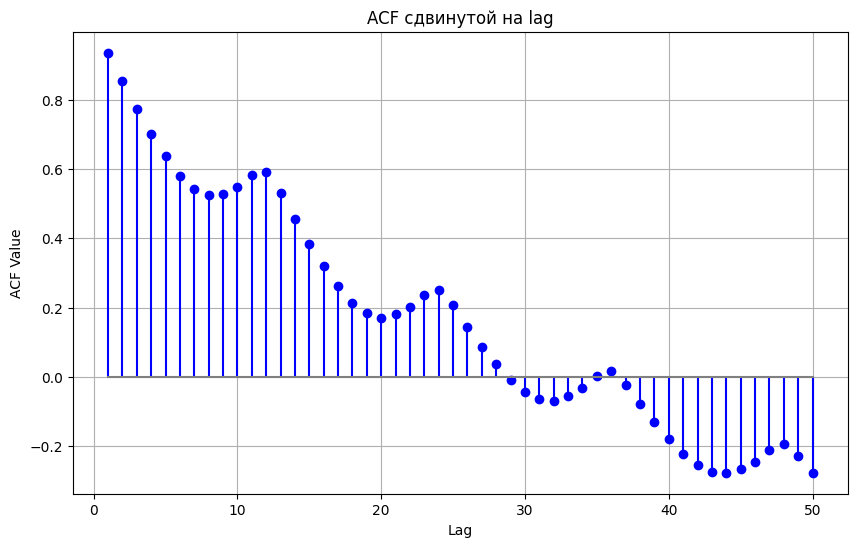

In [5]:
passengers_acf = calculate_acf(df['#Passengers'].values, max_lag)
plt.figure(figsize=(10, 6))
plt.stem(range(1, max_lag + 1), passengers_acf,
         markerfmt='o', linefmt='blue', basefmt='gray')
plt.title('ACF сдвинутой на lag')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.grid(True)
plt.show()


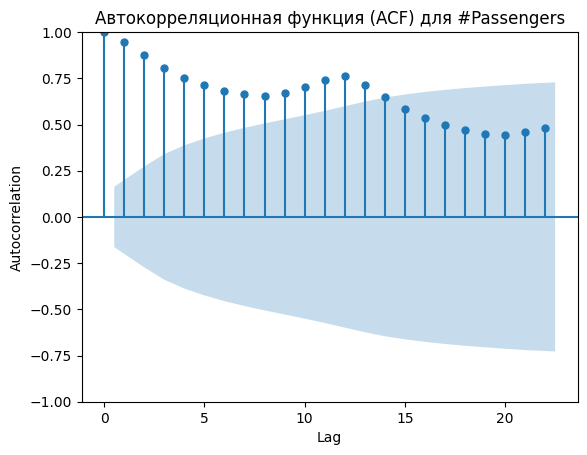

In [6]:
# 2
plot_acf(df['#Passengers'])
plt.title('Автокорреляционная функция (ACF) для #Passengers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


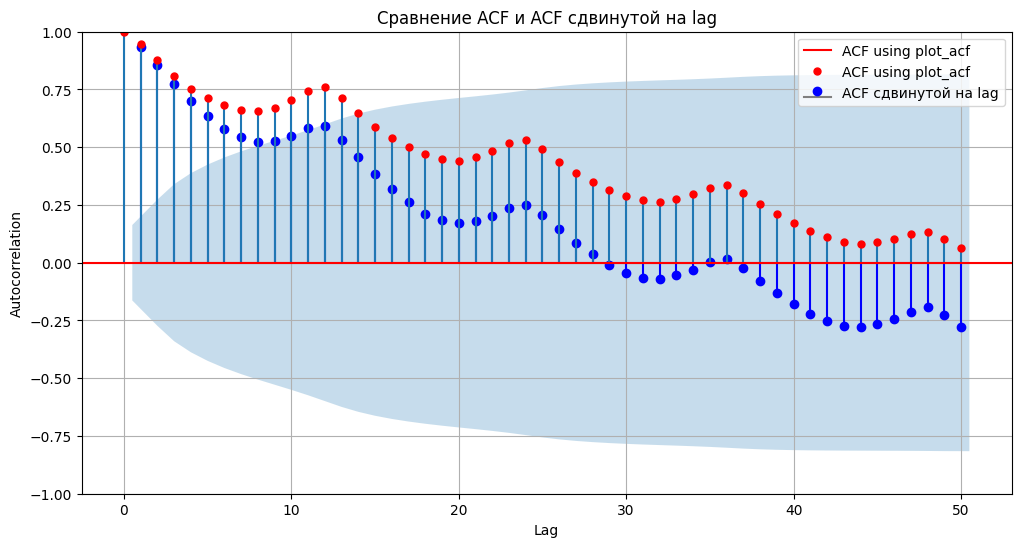

In [7]:
# Вычисление ACF с использованием statsmodels
fig, ax = plt.subplots(figsize=(12, 6))

# Построение ACF сдвинутой на lag
max_lag = 50
lag_values = range(1, max_lag + 1)
acf_values = calculate_acf(df['#Passengers'].values, max_lag)
ax.stem(lag_values, acf_values, markerfmt='o', linefmt='blue',
        basefmt='gray', label='ACF сдвинутой на lag')

# Построение ACF с использованием plot_acf
plot_acf(df['#Passengers'], ax=ax, lags=50,
         color='red', label='ACF using plot_acf')

# Настройка графика
ax.set_title('Сравнение ACF и ACF сдвинутой на lag')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.legend()
ax.grid(True)

plt.show()


In [10]:
# 3
births = pd.read_csv('births.csv')
births


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [11]:
births['Date'] = pd.to_datetime(births['Date'])
births = births.set_index(['Date'])

In [12]:
# Функция для вычисления автокорреляции
def calculate_acf(data, max_lag):
    acf_values = []
    for lag in range(1, max_lag + 1):
        shifted_data = np.roll(data, lag)
        acf = np.corrcoef(data, shifted_data)[0, 1]
        acf_values.append(acf)
    return acf_values


# Вычисление автокорреляции для лагов от 1 до 50
max_lag = 50
births_acf = calculate_acf(births['Births'].values, max_lag)

# Вывод результатов
for lag, acf_value in enumerate(births_acf, start=1):
    print(f'Lag {lag}: {acf_value}')


Lag 1: 0.21439300610284934
Lag 2: 0.144181384344021
Lag 3: 0.09457534723180532
Lag 4: 0.07162937519323179
Lag 5: 0.08251726436452832
Lag 6: 0.08297516624556411
Lag 7: 0.18910664667231486
Lag 8: 0.1486586471808158
Lag 9: 0.059978316220208897
Lag 10: 0.04675003965695131
Lag 11: 0.04120433909773956
Lag 12: -0.03847058820249612
Lag 13: 0.01164422877753714
Lag 14: 0.08745242908235906
Lag 15: 0.12713725877213153
Lag 16: 0.07595400406968135
Lag 17: 0.019428560755146394
Lag 18: 0.0636924092552773
Lag 19: 0.05931690239204598
Lag 20: 0.09004720640822882
Lag 21: 0.2608954860213775
Lag 22: 0.13863568378480923
Lag 23: 0.07905756126336864
Lag 24: 0.08719803914845026
Lag 25: 0.036574442300599405
Lag 26: 0.053262421965016564
Lag 27: 0.09625432079560343
Lag 28: 0.1745555424527315
Lag 29: 0.13639705236641178
Lag 30: 0.1364988083399753
Lag 31: 0.08394184799441759
Lag 32: 0.045020188106371505
Lag 33: 0.0023335571964751517
Lag 34: 0.025177773261485206
Lag 35: 0.050362376718456246
Lag 36: 0.1101948891738055

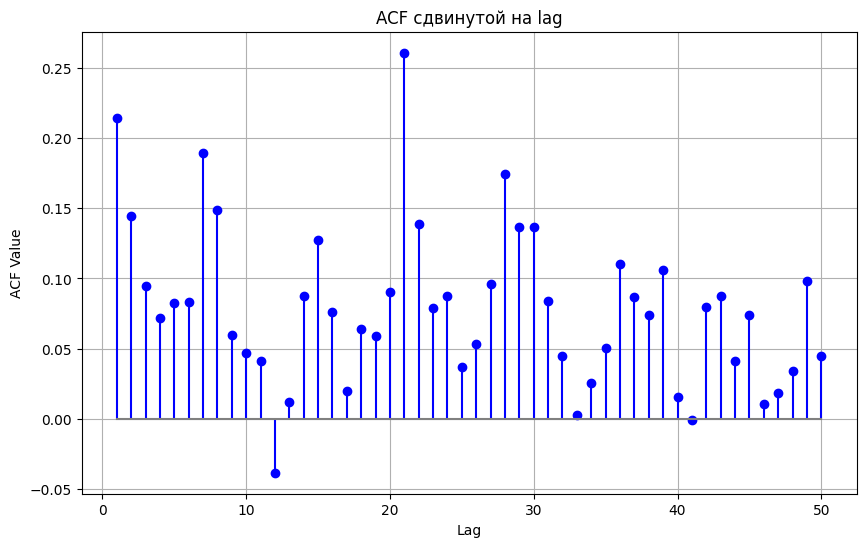

In [13]:
births_acf = calculate_acf(births['Births'].values, max_lag)
plt.figure(figsize=(10, 6))
plt.stem(range(1, max_lag + 1), births_acf,
         markerfmt='o', linefmt='blue', basefmt='gray')
plt.title('ACF сдвинутой на lag')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.grid(True)
plt.show()


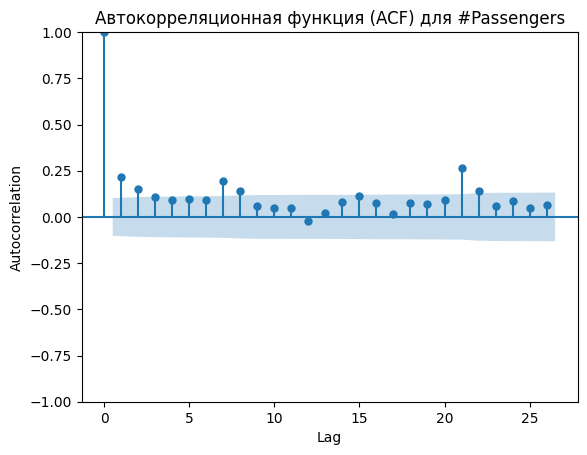

In [14]:
plot_acf(births['Births'])
plt.title('Автокорреляционная функция (ACF) для #Passengers')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


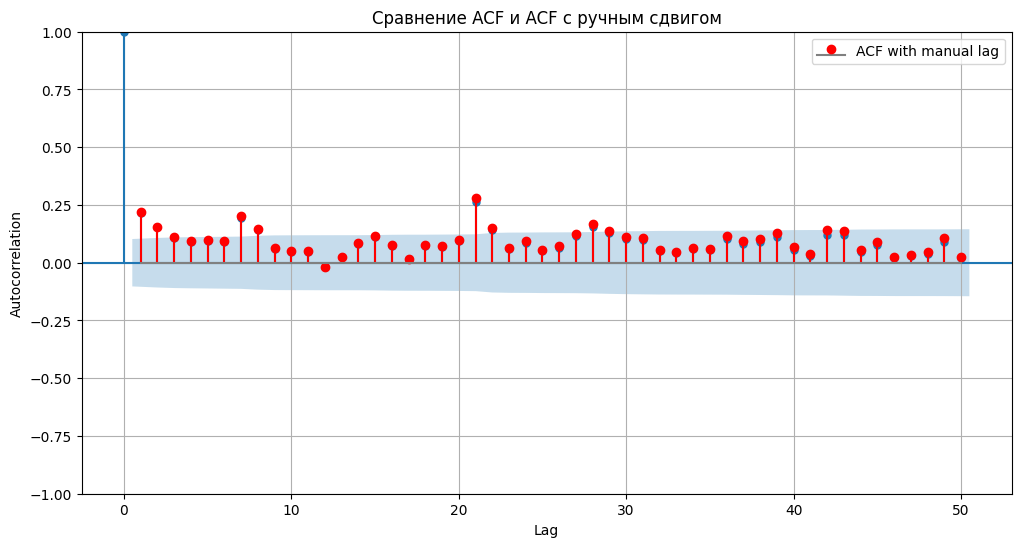

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(births['Births'], ax=ax, lags=50, title='ACF using plot_acf')

# Вычисление ACF вручную с использованием np.corrcoef и сдвига
max_lag = 50
lag_values = np.arange(1, max_lag + 1)
acf_values = [np.corrcoef(births['Births'].values[:-lag],
                          births['Births'].values[lag:])[0, 1] for lag in lag_values]

# Построение графика со сдвигом (lag)
plt.stem(lag_values, acf_values, markerfmt='o', linefmt='red',
         basefmt='gray', label='ACF with manual lag')

# Настройка графика
plt.title('Сравнение ACF и ACF с ручным сдвигом')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()


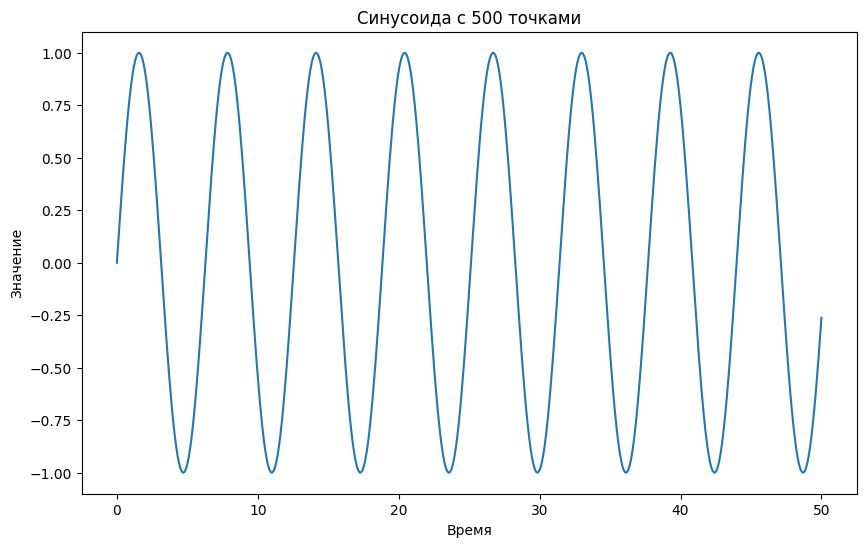

In [16]:
# 4
x = np.linspace(0, 50, 500)
y = np.sin(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Синусоида с 500 точками')
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()

In [17]:
corrs = []
for i in range(1, 100):
    c = np.corrcoef(y[:-i], y[i:])[0, 1]
    corrs.append(c)


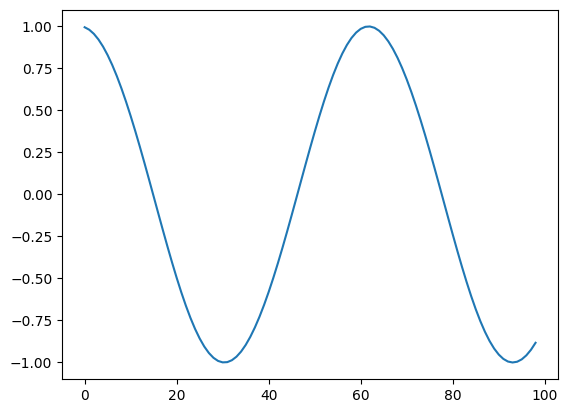

In [18]:
plt.plot(corrs)


In [19]:
max_corr_value = max(corrs)
max_corr_lag = np.argmax(corrs) + 1  # +1, так как лаг начинается с 1
print(f"Максимальная корреляция: {max_corr_value}")
print(f"Лаг с максимальной корреляцией: {max_corr_lag}")


Максимальная корреляция: 0.9995703783147455
Лаг с максимальной корреляцией: 63


In [22]:
# 5
#Используем Дики-Фуллера
adfuller(births)

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

p_value < 0.05 - ряд стационарный